# Dark vs Light images classification - no neural network

goal: extract features (color, texture) and classify images - for example, separating dark and light imgs

- P1: starting with compute dark vs light imgs using average colour pixels
- P2: advanced - using texture

## P1: extracting average colour pixels of every image in question

use luminance as the value to measure brightness

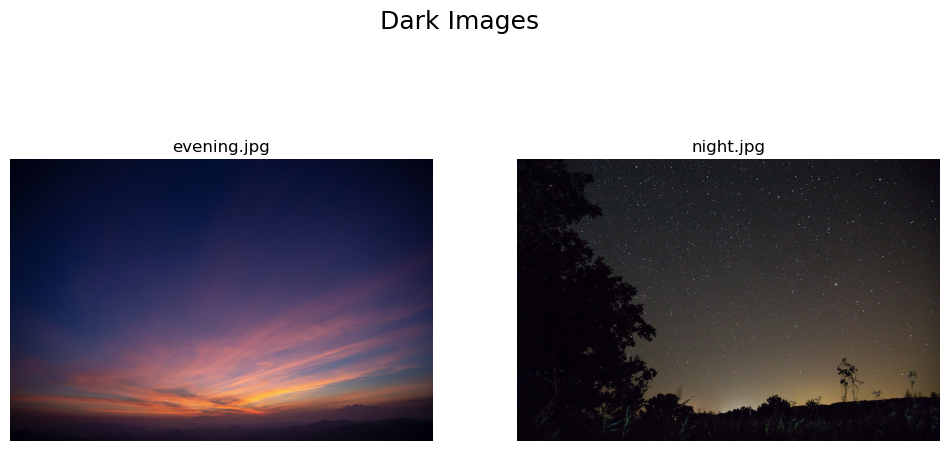

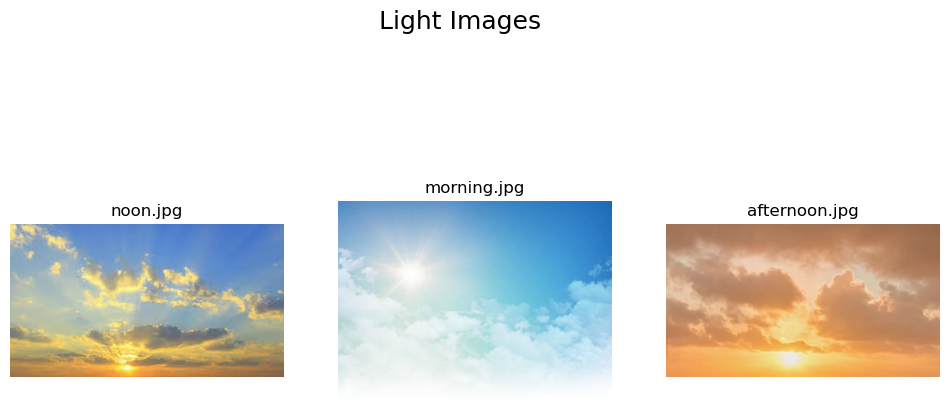

In [9]:
import cv2 as cv
import numpy as np
import glob 
import matplotlib.pyplot as plt

# load the images 
image_paths = glob.glob("light_dark/*.jpg")

images = {}
luminances = {}
threshold = 127
dark_images = []
light_images = []

# loop through the image paths
for image_path in image_paths:
    filename = image_path.split("/")[-1]
    img_bgr = cv.imread(image_path)
    img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB) # change the format 
    
    # store image
    images[filename] = img_rgb
    
    # calculate average pixel values - then calculate luminance
    average_color = img_rgb.mean(axis=(0, 1))  # average over height and width
    luminance = int(average_color[0]) * 0.299 + int(average_color[1]) * 0.587 + int(average_color[2]) * 0.114
    luminances[filename] = luminance

for filename, luminance in luminances.items():
    if luminance < threshold:
        dark_images.append(filename)
    else:
        light_images.append(filename)
        
# visualisation - dark images first
fig, axes = plt.subplots(1, len(dark_images), figsize=(12,6))
fig.suptitle("Dark Images", fontsize=18)

for i, filename in enumerate(dark_images):
    img_bgr = cv.imread(f"light_dark/{filename}")
    img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
    axes[i].imshow(img_rgb)
    axes[i].set_title(filename)
    axes[i].axis("off")
    
plt.show()


# visualisation - light images 
fig, axes = plt.subplots(1, len(light_images), figsize=(12,6))
fig.suptitle("Light Images", fontsize=18)

for i, filename in enumerate(light_images):
    img_bgr = cv.imread(f"light_dark/{filename}")
    img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
    axes[i].imshow(img_rgb)
    axes[i].set_title(filename)
    axes[i].axis("off")
    
plt.show()
